# Importing necessary packages

In [1]:
import numpy as np
import pydicom
import os
import matplotlib.pyplot as plt
from glob import glob
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.transform import resize
from sklearn.cluster import KMeans
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *
init_notebook_mode(connected=True) 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

# import os, glob

**This is to read all the dicom files from the folder**

In [2]:
data_path = "E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR/"
output_path = working_path = "E:/MR/"
g = []
for i in range(1,40):
    file  = glob(data_path +'/'+ str(i) + '/T1DUAL/DICOM_anon/InPhase/*.dcm')
    for j in file:
        g.append(j)
# print(g)
# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d DICOM images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:5]))

Total of 647 DICOM images.
First 5 filenames:
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/DICOM_anon/InPhase\IMG-0004-00002.dcm
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/DICOM_anon/InPhase\IMG-0004-00004.dcm
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/DICOM_anon/InPhase\IMG-0004-00006.dcm
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/DICOM_anon/InPhase\IMG-0004-00008.dcm
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/DICOM_anon/InPhase\IMG-0004-00010.dcm


**Read all the ground Truth**

In [3]:
data_path = "E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR/"
output_path1 = working_path = "E:/ground"
gt=[]
for i in range(1,40):
    file  = glob(data_path +'/'+ str(i) + '/T1DUAL/Ground/*.png')
    for j in file:
        gt.append(j)
# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d DICOM images.\nFirst 5 filenames:" % len(gt))
print ('\n'.join(gt[:5]))

Total of 647 DICOM images.
First 5 filenames:
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/Ground\IMG-0004-00002.png
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/Ground\IMG-0004-00004.png
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/Ground\IMG-0004-00006.png
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/Ground\IMG-0004-00008.png
E:/PGM/CHAOS_Train_Sets(1)/Train_Sets/MR//1/T1DUAL/Ground\IMG-0004-00010.png


# Extracting pixel information from dicom file and viewing it 

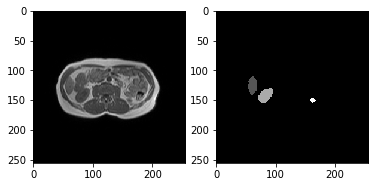

In [4]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(g), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(g):
    out_dcm = pydicom.dcmread(img_path)
    img = out_dcm.pixel_array
#     img = imread(out_pix)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(gt):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

**Converting into numpy array and saving it to segment the organs from the original image** 

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)
np.save('x_val.npy', x_val)
np.save('y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(582, 256, 256, 1) (582, 256, 256, 1)
(65, 256, 256, 1) (65, 256, 256, 1)
